In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# EDA

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/code/driver_imgs_list.csv')
dataset = dataset.sort_values(by=['classname'])
dataset.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
6883,p024,c0,img_48028.jpg
6884,p024,c0,img_18837.jpg
6885,p024,c0,img_81350.jpg
6886,p024,c0,img_1039.jpg


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22424 entries, 0 to 22423
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    22424 non-null  object
 1   classname  22424 non-null  object
 2   img        22424 non-null  object
dtypes: object(3)
memory usage: 700.8+ KB


In [5]:
dataset['classname'].unique()

array(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'],
      dtype=object)

In [6]:
dataset['classname'].value_counts().sort_index(ascending=True)

c0    2489
c1    2267
c2    2317
c3    2346
c4    2326
c5    2312
c6    2325
c7    2002
c8    1911
c9    2129
Name: classname, dtype: int64

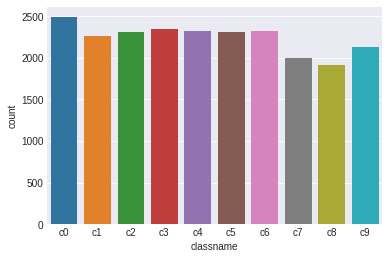

In [7]:
sns.countplot(x='classname', data=dataset)
plt.show()

In [8]:
df_raw = dataset[dataset['classname'].isin(['c0', 'c1', 'c2', 'c3', 'c4'])].reset_index(drop=True)

In [9]:
df_raw.tail()

,subject,classname,img
11740,p016,c4,img_14370.jpg
11741,p016,c4,img_58465.jpg
11742,p016,c4,img_31046.jpg
11743,p016,c4,img_66089.jpg
11744,p016,c4,img_10103.jpg


In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11745 entries, 0 to 11744
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    11745 non-null  object
 1   classname  11745 non-null  object
 2   img        11745 non-null  object
dtypes: object(3)
memory usage: 275.4+ KB


In [11]:
df_raw['classname'].unique()

array(['c0', 'c1', 'c2', 'c3', 'c4'], dtype=object)

In [12]:
df_raw['classname'].value_counts().sort_index(ascending=True)

c0    2489
c1    2267
c2    2317
c3    2346
c4    2326
Name: classname, dtype: int64

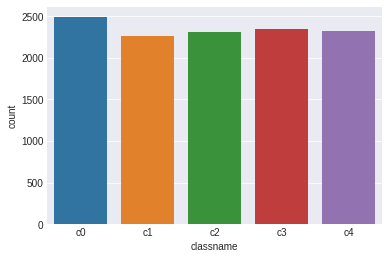

In [13]:
sns.countplot(x='classname', data=df_raw)
plt.show()

# Hyperparameter Tuning

In [14]:
df = pd.read_csv('/content/drive/MyDrive/code/results.csv')
df.head()

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_lr,param_max_epochs,param_module__act,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,165,4.099666,7.588509,0.007458,0.007197,8,0.0001,10,relu,...,0.193939,0.082656,2307,0.212121,0.250000,0.257576,0.250000,0.234848,0.240909,0.016177
1,0,165,0.283410,0.005537,0.003455,0.000042,8,0.0001,10,relu,...,0.139394,0.036364,4671,0.174242,0.234848,0.265152,0.166667,0.136364,0.195455,0.047286
2,0,165,0.305409,0.006156,0.003604,0.000137,8,0.0001,10,relu,...,0.187879,0.075210,2672,0.219697,0.333333,0.287879,0.318182,0.272727,0.286364,0.039626
3,0,165,0.302091,0.013096,0.003528,0.000064,8,0.0001,10,relu,...,0.193939,0.073231,2482,0.151515,0.143939,0.257576,0.204545,0.151515,0.181818,0.043651
4,0,165,0.297859,0.004923,0.004143,0.000514,8,0.0001,10,relu,...,0.175758,0.075210,2901,0.250000,0.265152,0.257576,0.393939,0.242424,0.281818,0.056570


In [15]:
df = df[df.columns.drop(list(df.filter(regex='std')))]
df.head()

,iter,n_resources,mean_fit_time,mean_score_time,param_batch_size,param_lr,param_max_epochs,param_module__act,param_module__hidden,param_optimizer,...,split3_test_score,split4_test_score,mean_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score
0,0,165,4.099666,0.007458,8,0.0001,10,relu,4,<class 'torch.optim.adam.Adam'>,...,0.121212,0.272727,0.193939,2307,0.212121,0.250000,0.257576,0.250000,0.234848,0.240909
1,0,165,0.283410,0.003455,8,0.0001,10,relu,4,<class 'torch.optim.sgd.SGD'>,...,0.181818,0.121212,0.139394,4671,0.174242,0.234848,0.265152,0.166667,0.136364,0.195455
2,0,165,0.305409,0.003604,8,0.0001,10,relu,8,<class 'torch.optim.adam.Adam'>,...,0.181818,0.151515,0.187879,2672,0.219697,0.333333,0.287879,0.318182,0.272727,0.286364
3,0,165,0.302091,0.003528,8,0.0001,10,relu,8,<class 'torch.optim.sgd.SGD'>,...,0.181818,0.151515,0.193939,2482,0.151515,0.143939,0.257576,0.204545,0.151515,0.181818
4,0,165,0.297859,0.004143,8,0.0001,10,relu,16,<class 'torch.optim.adam.Adam'>,...,0.212121,0.303030,0.175758,2901,0.250000,0.265152,0.257576,0.393939,0.242424,0.281818


In [16]:
df = df[df.columns.drop(list(df.filter(regex='split')))]
df.head()

,iter,n_resources,mean_fit_time,mean_score_time,param_batch_size,param_lr,param_max_epochs,param_module__act,param_module__hidden,param_optimizer,params,mean_test_score,rank_test_score,mean_train_score
0,0,165,4.099666,0.007458,8,0.0001,10,relu,4,<class 'torch.optim.adam.Adam'>,"{'batch_size': 8, 'lr': 0.0001, 'max_epochs': ...",0.193939,2307,0.240909
1,0,165,0.283410,0.003455,8,0.0001,10,relu,4,<class 'torch.optim.sgd.SGD'>,"{'batch_size': 8, 'lr': 0.0001, 'max_epochs': ...",0.139394,4671,0.195455
2,0,165,0.305409,0.003604,8,0.0001,10,relu,8,<class 'torch.optim.adam.Adam'>,"{'batch_size': 8, 'lr': 0.0001, 'max_epochs': ...",0.187879,2672,0.286364
3,0,165,0.302091,0.003528,8,0.0001,10,relu,8,<class 'torch.optim.sgd.SGD'>,"{'batch_size': 8, 'lr': 0.0001, 'max_epochs': ...",0.193939,2482,0.181818
4,0,165,0.297859,0.004143,8,0.0001,10,relu,16,<class 'torch.optim.adam.Adam'>,"{'batch_size': 8, 'lr': 0.0001, 'max_epochs': ...",0.175758,2901,0.281818


In [17]:
df = df.drop(["mean_score_time", "params"], axis=1)
df.head()

,iter,n_resources,mean_fit_time,param_batch_size,param_lr,param_max_epochs,param_module__act,param_module__hidden,param_optimizer,mean_test_score,rank_test_score,mean_train_score
0,0,165,4.099666,8,0.0001,10,relu,4,<class 'torch.optim.adam.Adam'>,0.193939,2307,0.240909
1,0,165,0.283410,8,0.0001,10,relu,4,<class 'torch.optim.sgd.SGD'>,0.139394,4671,0.195455
2,0,165,0.305409,8,0.0001,10,relu,8,<class 'torch.optim.adam.Adam'>,0.187879,2672,0.286364
3,0,165,0.302091,8,0.0001,10,relu,8,<class 'torch.optim.sgd.SGD'>,0.193939,2482,0.181818
4,0,165,0.297859,8,0.0001,10,relu,16,<class 'torch.optim.adam.Adam'>,0.175758,2901,0.281818


In [18]:
df.loc[df['param_optimizer'] == "<class 'torch.optim.adam.Adam'>", 'param_optimizer'] = "Adam"
df.loc[df['param_optimizer'] == "<class 'torch.optim.sgd.SGD'>", 'param_optimizer'] = "SGD"
df.head()

,iter,n_resources,mean_fit_time,param_batch_size,param_lr,param_max_epochs,param_module__act,param_module__hidden,param_optimizer,mean_test_score,rank_test_score,mean_train_score
0,0,165,4.099666,8,0.0001,10,relu,4,Adam,0.193939,2307,0.240909
1,0,165,0.283410,8,0.0001,10,relu,4,SGD,0.139394,4671,0.195455
2,0,165,0.305409,8,0.0001,10,relu,8,Adam,0.187879,2672,0.286364
3,0,165,0.302091,8,0.0001,10,relu,8,SGD,0.193939,2482,0.181818
4,0,165,0.297859,8,0.0001,10,relu,16,Adam,0.175758,2901,0.281818


In [19]:
column_names = ["iter", 
                "n_resources", 
                "param_batch_size", 
                "param_lr", 
                "param_max_epochs", 
                "param_module__act", 
                "param_module__hidden", 
                "param_optimizer", 
                "mean_train_score", 
                "mean_test_score", 
                "mean_fit_time", 
                "rank_test_score"]

df = df.reindex(columns=column_names)
df.head()

,iter,n_resources,param_batch_size,param_lr,param_max_epochs,param_module__act,param_module__hidden,param_optimizer,mean_train_score,mean_test_score,mean_fit_time,rank_test_score
0,0,165,8,0.0001,10,relu,4,Adam,0.240909,0.193939,4.099666,2307
1,0,165,8,0.0001,10,relu,4,SGD,0.195455,0.139394,0.283410,4671
2,0,165,8,0.0001,10,relu,8,Adam,0.286364,0.187879,0.305409,2672
3,0,165,8,0.0001,10,relu,8,SGD,0.181818,0.193939,0.302091,2482
4,0,165,8,0.0001,10,relu,16,Adam,0.281818,0.175758,0.297859,2901


In [20]:
df['iter'].value_counts()

0    3750
1     938
2     235
3      59
4      15
5       4
Name: iter, dtype: int64

Jumlah Kombinasi Hyperparameter Tiap Iterasi


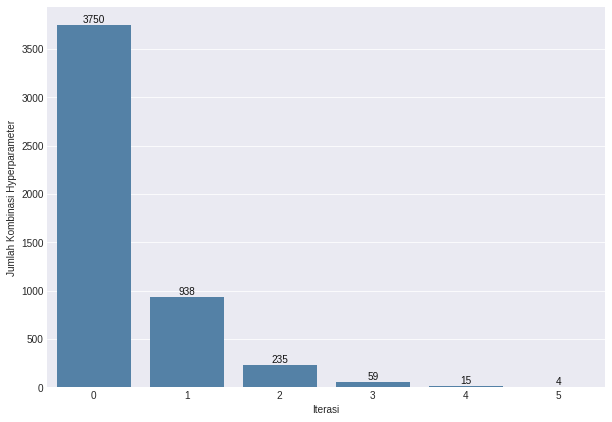

In [21]:
# plot konfigurasi tiap iterasi
plt.figure(figsize=(10,7))
ax1 = sns.countplot(x='iter', data=df, color='steelblue')
plt.xlabel('Iterasi')
plt.ylabel('Jumlah Kombinasi Hyperparameter')

print('Jumlah Kombinasi Hyperparameter Tiap Iterasi')

for p in ax1.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax1.annotate(int(y), (x.mean(), y+0.01), ha='center', va='bottom', color='#101010')

plt.show()

In [22]:
df[['iter', 'n_resources']].groupby(['iter']).max()

,n_resources
iter,
0,165
1,165
2,165
3,660
4,2640
5,10560


Jumlah Train & Validation Data Tiap Iterasi


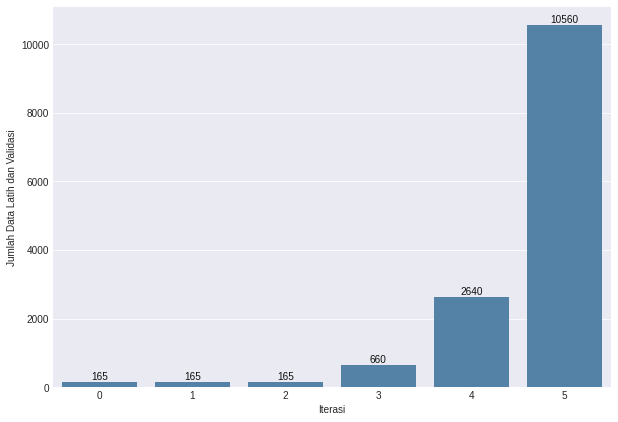

In [23]:
# plot penambahan jumlah data latih tiap iterasi
plt.figure(figsize=(10,7))
ax2 = sns.barplot(x='iter',
                  y='n_resources',
                  color='steelblue',
                  data=df[['iter', 'n_resources']].groupby(df['iter']).max())
plt.xlabel('Iterasi')
plt.ylabel('Jumlah Data Latih dan Validasi')

print('Jumlah Train & Validation Data Tiap Iterasi')

for p in ax2.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax2.annotate(int(y), (x.mean(), y+0.01), ha='center', va='bottom', color='#101010')

plt.show()

In [24]:
df_prog = df.loc[df.groupby('iter')['rank_test_score'].idxmin()]
df_prog

,iter,n_resources,param_batch_size,param_lr,param_max_epochs,param_module__act,param_module__hidden,param_optimizer,mean_train_score,mean_test_score,mean_fit_time,rank_test_score
238,0,165,8,0.001,20,tanh,64,Adam,0.898485,0.515152,0.632927,83
4646,1,165,16,0.001,50,tanh,64,Adam,0.910606,0.527273,2.216928,80
4867,2,165,32,0.001,50,tanh,64,Adam,0.900000,0.539394,2.179689,76
4974,3,660,16,0.001,25,tanh,16,Adam,0.957576,0.872727,4.370218,20
4992,4,2640,16,0.001,50,tanh,32,Adam,0.983712,0.953030,34.421457,5
5000,5,10560,16,0.001,50,tanh,32,Adam,0.991288,0.984470,137.664058,1


Akurasi Model Tiap Iterasi


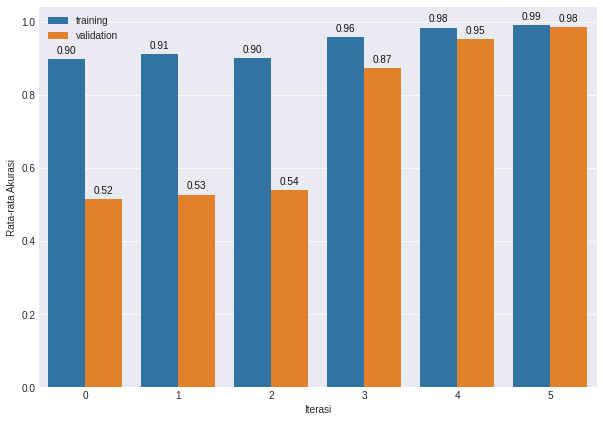

In [25]:
df_tidy = df_prog[['iter', 'mean_train_score', 'mean_test_score']]
df_tidy.columns = ['iter', 'training', 'validation']
df_tidy = df_tidy.melt(id_vars='iter')

plt.figure(figsize=(10, 7))
ax3 = sns.barplot(x='iter', y='value', hue='variable', data=df_tidy)

for p in ax3.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax3.annotate('{:.2f}'.format(y), (x.mean(), y+0.01), ha='center', va='bottom', color='#101010')

print('Akurasi Model Tiap Iterasi')
plt.xlabel('Iterasi')
plt.ylabel('Rata-rata Akurasi')
plt.legend()

plt.show()

## Merged plot

### version 1

bar plot with legend

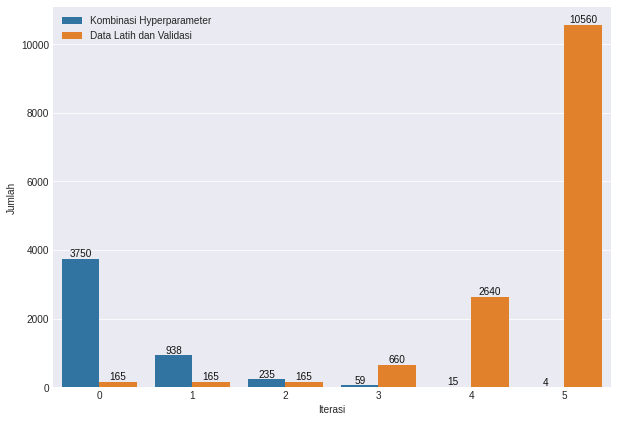

In [26]:
df_m1 = df.loc[df.groupby('iter')['rank_test_score'].idxmin()][['iter', 'n_resources']].reset_index(drop=True)
df_m1.insert(1, 'count', df['iter'].value_counts())
df_m1.columns = ['iter', 'Kombinasi Hyperparameter', 'Data Latih dan Validasi']
df_m1 = df_m1.melt(id_vars='iter')

plt.figure(figsize=(10, 7))
ax4 = sns.barplot(x='iter', y='value', hue='variable', data=df_m1)

for p in ax4.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax4.annotate('{:.0f}'.format(y), (x.mean(), y+0.01), ha='center', va='bottom', color='#101010')

plt.xlabel('Iterasi')
plt.ylabel('Jumlah')
plt.legend()

plt.show()

### version 2

double y-axis

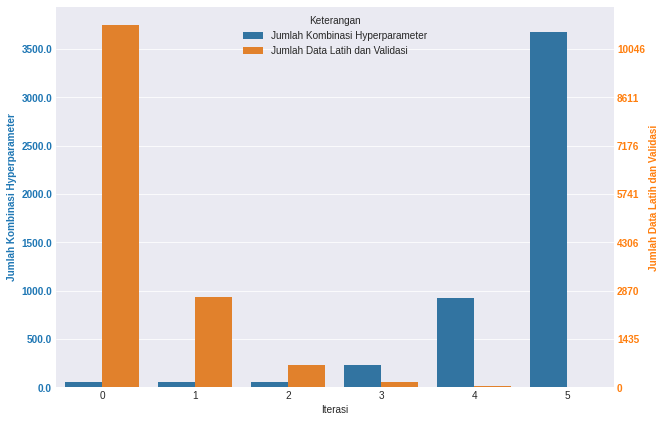

In [27]:
df_m3 = df.loc[df.groupby('iter')['rank_test_score'].idxmin()][['iter', 'n_resources']].reset_index(drop=True)
df_m3.insert(2, 'count', df['iter'].value_counts())
df_m3.columns = ['iter', 'Jumlah Kombinasi Hyperparameter', 'Jumlah Data Latih dan Validasi']
df_m3_melted = df_m3.melt(id_vars='iter', var_name="Keterangan", value_name="value_numbers")

# Scale the data, just a simple example of how you might determine the scaling
mask = df_m3_melted.Keterangan.isin(['Jumlah Kombinasi Hyperparameter'])
scale = df_m3_melted[~mask].value_numbers.mean()/df_m3_melted[mask].value_numbers.mean()
df_m3_melted.loc[mask, 'value_numbers'] = df_m3_melted.loc[mask, 'value_numbers']*scale

# Plot
fig, axx1 = plt.subplots(figsize=(10, 7))

g = sns.barplot(x='iter', y="value_numbers", hue="Keterangan",\
                data=df_m3_melted, ax=axx1)

plt.xlabel('Iterasi')

# Create a second y-axis w/ the scaled ticks
axx1.set_ylabel('Jumlah Kombinasi Hyperparameter', color='#1f77b4', weight='bold')
axx1.set_yticklabels(axx1.get_yticks(), color='#1f77b4', weight='bold')
axx2 = axx1.twinx()

# Ensure ticks occur at the same positions, then modify labels
axx2.set_ylim(axx1.get_ylim())
axx2.set_yticklabels(np.round(axx1.get_yticks()/scale, 0).astype(int), color='#ff7f0e', weight='bold')
axx2.set_ylabel('Jumlah Data Latih dan Validasi', color='#ff7f0e', weight='bold')
axx2.grid(False)

plt.show()

# Waktu Komputasi

Waktu Komputasi Model


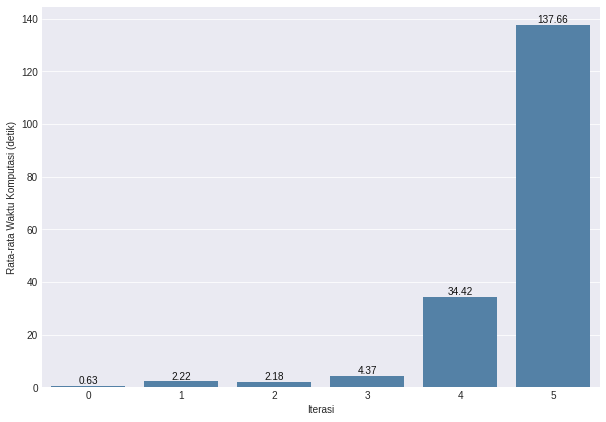

In [28]:
plt.figure(figsize=(10, 7))
ax5 = sns.barplot(x='iter',
                  y='mean_fit_time',
                  color='steelblue',
                  data=df_prog[['iter', 'mean_fit_time']])

print('Waktu Komputasi Model')
plt.xlabel('Iterasi')
plt.ylabel('Rata-rata Waktu Komputasi (detik)')

for p in ax5.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax5.annotate('{:.2f}'.format(y), (x.mean(), y+0.01), ha='center', va='bottom', color='#101010')

plt.show()

In [29]:
tuning_time = df['mean_fit_time'].sum()*5
print('Waktu komputasi total = {:.3f} detik'.format(tuning_time))
print('Waktu komputasi total = {:.2f} jam'.format(tuning_time/3600))

Waktu komputasi total = 29445.642 detik
Waktu komputasi total = 8.18 jam




---


# Model Terbaik

In [30]:
classnames = {'c0' : 'Safe driving',
              'c1' : 'Texting-right',
              'c2' : 'Talking on the phone-right',
              'c3' : 'Texting-left',
              'c4' : 'Talking on the phone-left'}

history_df = pd.read_csv('/content/drive/MyDrive/code/history.csv')
df_cm = pd.read_csv('/content/drive/MyDrive/code/confusion-matrix-enc.csv', index_col=0)
mispred_df = pd.read_csv('/content/drive/MyDrive/code/mispred.csv')

Loss Model


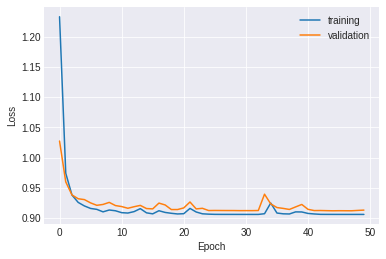

In [31]:
print('Loss Model')

plt.plot(history_df['train_loss'], label='training')
plt.plot(history_df['valid_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Akurasi Model


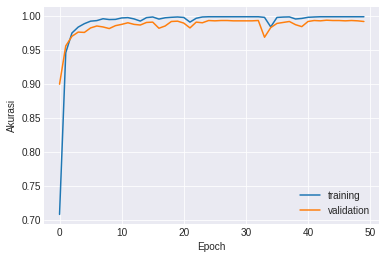

In [32]:
print('Akurasi Model')

plt.plot(history_df['accuracy'], label='training')
plt.plot(history_df['valid_acc'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix
Confusion Matrix


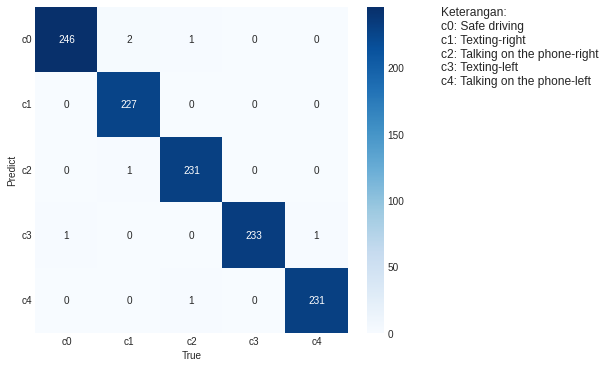

In [33]:
print('Confusion Matrix')

plt.figure(figsize=(7,6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('True')
plt.ylabel('Predict')
print('Confusion Matrix')
plt.yticks(rotation='horizontal')

legend = "Keterangan:\n"+str(classnames).replace("{", "").replace("}", "").replace("'", "").replace(", ", "\n")
plt.text(0.93, 0.7, legend, fontsize=12, transform=plt.gcf().transFigure)

plt.show()

## Akurasi Per Kelas

In [34]:
cm_norm = df_cm.to_numpy().astype('float') / df_cm.to_numpy().sum(axis=1)[:, np.newaxis]
cm_norm.diagonal()

array([0.98795181, 1.        , 0.99568966, 0.99148936, 0.99568966])

In [35]:
print('Akurasi Per Kelas')
df_acc_each_class = pd.DataFrame(data=list(zip(list(classnames.values()), 
                                               list(cm_norm.diagonal()))), 
                                 columns=['Kelas', 'Akurasi'])
df_acc_each_class

Akurasi Per Kelas


,Kelas,Akurasi
0,Safe driving,0.987952
1,Texting-right,1.000000
2,Talking on the phone-right,0.995690
3,Texting-left,0.991489
4,Talking on the phone-left,0.995690


## Misklasifikasi

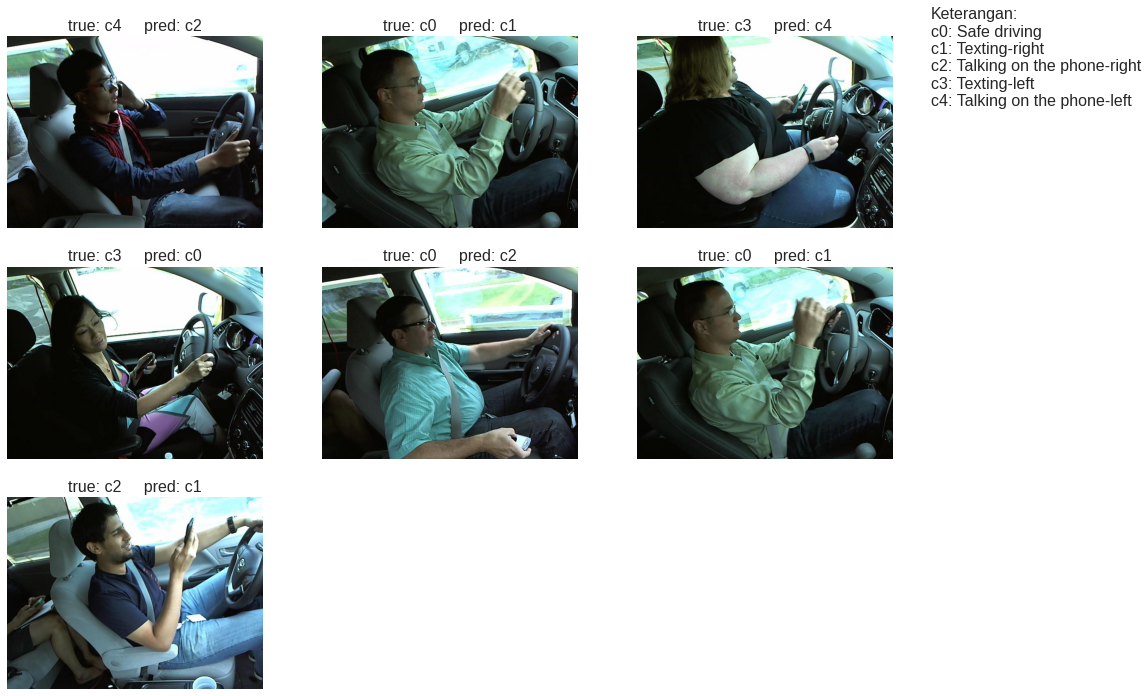

In [36]:
plt.figure(figsize=(16, 12))
num_samples = 9 if len(mispred_df) >=  9 else len(mispred_df)
for i, rows in mispred_df.sample(num_samples).reset_index(drop=True).iterrows():
    plt.subplot(330 + 1 + i)
    img = plt.imread(f"{'/content/drive/MyDrive/code/imgs_dataset/' + rows['classname']}/{rows['img']}")
    plt.title(f"true: c{rows['y_test']}     pred: c{rows['y_pred']}", fontsize=16)
    plt.imshow(img)
    plt.grid(None)
    plt.axis('off')
  
legend = "Keterangan:\n"+str(classnames).replace("{", "").replace("}", "").replace("'", "").replace(", ", "\n")
plt.text(0.93, 0.8, legend, fontsize=16, transform=plt.gcf().transFigure)

plt.show()